# Building a Linear Regression Model

In [1]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load in data set
df = sns.load_dataset('tips')

In [23]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Separate data into features (total_bill) which will be used to predict the target (tip)
X = df['total_bill']
y = df['tip']

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

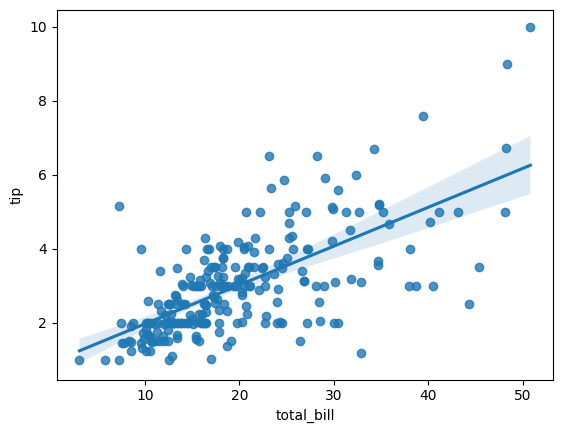

In [5]:
# Plot a regression line on the data
sns.regplot(x=X, y=y, data=df)

In [16]:
# Convert X data to numpy array for formatting purposes.
xarr = X.to_numpy().reshape(-1,1)

# Split data randomly into training and testing sets. Reserve 30% (test_size=0.3) for testing.
X_train, X_test, y_train, y_test = train_test_split(xarr, y, test_size=0.3, random_state=0)

In [17]:
# Instantiate a Linear Regression model
regr = linear_model.LinearRegression()

In [18]:
# Fit the model to the training data
regr.fit(X_train, y_train)

LinearRegression()

In [19]:
# Use the model to predict tips on total bills from the testing data (ignoring y_test)
y_pred = regr.predict(X_test)
y_pred

array([2.71486884, 2.78639251, 2.90900452, 1.65836207, 2.57999564,
       1.50509707, 2.74858715, 3.30136293, 2.77208778, 4.45800284,
       3.50060744, 3.49345507, 2.35520697, 2.24587793, 2.28879213,
       4.02375199, 1.77075641, 2.3480546 , 2.83645908, 3.2778623 ,
       3.98901192, 3.05511716, 2.55240794, 2.45431834, 2.29798803,
       2.59327861, 2.16004953, 3.96244599, 3.50162921, 2.5289073 ,
       2.42264357, 2.19274606, 2.49314547, 1.99963215, 2.78639251,
       2.28572683, 2.64743224, 1.97306622, 5.85577969, 2.55036441,
       1.79425705, 2.18763723, 2.52073317, 3.96755482, 2.22135553,
       2.65151931, 2.78128368, 3.12255376, 2.66173698, 3.66409011,
       4.2567148 , 2.74552185, 3.01118119, 5.83943142, 1.89847725,
       2.14676656, 3.97572896, 3.03161652, 2.37462053, 2.21113786,
       3.70496078, 2.53299437, 3.07963956, 3.47199797, 3.99718606,
       2.5043849 , 2.60043097, 4.2720413 , 1.97306622, 3.87763935,
       2.4890584 , 1.99145802, 3.43010554, 2.37972937])

In [20]:
# Print out modeling metrics for evaluation
print("Coefficients: ", regr.coef_) # in this case, the slope of the regression line
print("Mean squared error ", mean_squared_error(y_test, y_pred)) # squared average difference between y_test and y_pred
print("Coefficient of determination ", r2_score(y_test, y_pred)) # correlation coefficient

Coefficients:  [0.10217667]
Mean squared error  0.8711845537539947
Coefficient of determination  0.49515102188632776


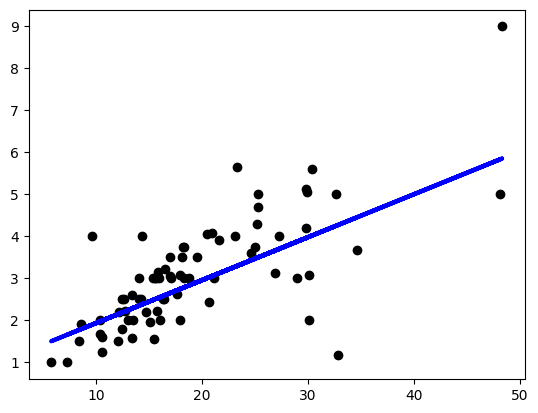

In [22]:
# Plot testing data and prediction data on the same graph
plt.scatter(X_test, y_test, color='black') # black dots will represent the actual data
plt.plot(X_test, y_pred, color='blue', linewidth=3) # blue line will represent the predictions
plt.show()